<a href="https://colab.research.google.com/github/LuisPalmaBugler/Kaggle/blob/master/Santander_Costumer_NE_RN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

from sklearn import preprocessing
from sklearn.preprocessing import normalize
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.utils import to_categorical
from keras.optimizers import SGD

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
train = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Kaggle/Santander/train.csv')

In [3]:
train_1 = train.loc[train["target"] == 1]
train_1.shape

(20098, 202)

In [4]:
train_0 = train.loc[train["target"] == 0]
train_0.shape

(179902, 202)

In [5]:
train_1d = train_1.drop(["target","ID_code"], axis=1)
train_0d = train_0.drop(["target","ID_code"], axis=1)
train_1d = normalize(train_1d, norm = 'max', axis = 0)
train_0d = normalize(train_0d, norm = 'max', axis = 0)

In [6]:
train_1d_std = train_1d.std(axis=0)
train_1d_std = pd.DataFrame(train_1d_std)
train_0d_std = train_0d.std(axis=0)
train_0d_std = pd.DataFrame(train_0d_std)

In [7]:
X_trainset_0d, X_testset_0d, y_trainset_0d, y_testset_0d = train_test_split(train_0d, train_0["target"] , test_size=0.25, random_state=1234)
X_testset_0d = pd.DataFrame(X_testset_0d)
train_f = train.loc[X_testset_0d.index, :]
train_fd = train_f.drop(["target","ID_code"], axis=1)
train_fd = normalize(train_fd, norm = 'max', axis = 0)
train_F = train_f.append(train_1)

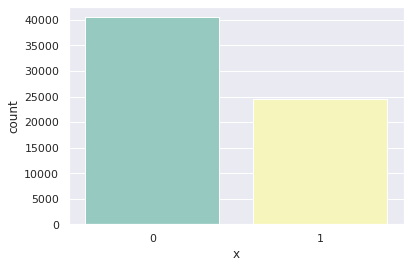

In [8]:
train_yx_0 = pd.DataFrame(train_F["target"])
train_yx_0["x"] = train_F["target"]
sns.countplot(train_yx_0["x"], palette='Set3')

In [9]:
train_Fn = train_F.drop(["target","ID_code"], axis=1)
train_Fn = normalize(train_Fn, norm = 'max', axis = 0)
train_Fn = pd.DataFrame(train_Fn)

In [10]:
X_trainset_v, X_validset, y_trainset_v, y_validset = train_test_split(train_Fn, train_F["target"] , test_size=0.1, random_state=1234)

In [11]:
n_cols = X_trainset_v.shape[1]

In [12]:
def regression_model():
    model = Sequential()
    model.add(Dense(50, kernel_initializer='uniform', activation='relu', input_shape=(n_cols,)))
    model.add(Dropout(0.15))
    model.add(Dense(50, kernel_initializer='uniform', activation='softplus'))
    model.add(Dropout(0.15))
    model.add(Dense(2, kernel_initializer='uniform', activation='softmax'))
    
    sgd = SGD(lr=0.05, decay=1e-6, momentum=0.9, nesterov=True)
    model.compile(optimizer=sgd, loss='categorical_crossentropy', metrics = ['accuracy'])
    return model

In [13]:
y_trainset_vc = to_categorical(y_trainset_v, num_classes = 2, dtype="int64")

In [14]:
model = regression_model()
model.fit(X_trainset_v, y_trainset_vc, validation_split=0.2, epochs=40, verbose=2)

Epoch 1/40
1465/1465 - 2s - loss: 0.5947 - accuracy: 0.6816 - val_loss: 0.5619 - val_accuracy: 0.7081
Epoch 2/40
1465/1465 - 2s - loss: 0.5068 - accuracy: 0.7551 - val_loss: 0.4890 - val_accuracy: 0.7644
Epoch 3/40
1465/1465 - 2s - loss: 0.4933 - accuracy: 0.7653 - val_loss: 0.4728 - val_accuracy: 0.7801
Epoch 4/40
1465/1465 - 2s - loss: 0.4909 - accuracy: 0.7664 - val_loss: 0.5742 - val_accuracy: 0.7086
Epoch 5/40
1465/1465 - 2s - loss: 0.4852 - accuracy: 0.7710 - val_loss: 0.4828 - val_accuracy: 0.7806
Epoch 6/40
1465/1465 - 2s - loss: 0.4830 - accuracy: 0.7720 - val_loss: 0.5029 - val_accuracy: 0.7572
Epoch 7/40
1465/1465 - 2s - loss: 0.4797 - accuracy: 0.7734 - val_loss: 0.4725 - val_accuracy: 0.7850
Epoch 8/40
1465/1465 - 2s - loss: 0.4787 - accuracy: 0.7749 - val_loss: 0.4833 - val_accuracy: 0.7720
Epoch 9/40
1465/1465 - 2s - loss: 0.4757 - accuracy: 0.7741 - val_loss: 0.4912 - val_accuracy: 0.7785
Epoch 10/40
1465/1465 - 2s - loss: 0.4735 - accuracy: 0.7762 - val_loss: 0.4744 - 

In [15]:
train_history = model.history.history

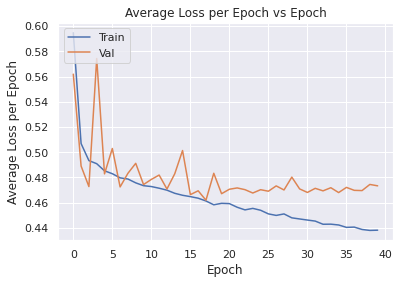

In [16]:
plt.plot(train_history['loss'])
plt.plot(train_history['val_loss'])
plt.title('Average Loss per Epoch vs Epoch')
plt.ylabel('Average Loss per Epoch')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

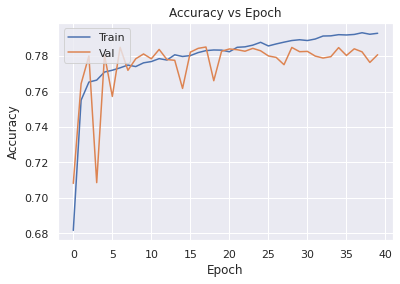

In [17]:
plt.plot(train_history['accuracy'])
plt.plot(train_history['val_accuracy'])
plt.title('Accuracy vs Epoch')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

In [18]:
yhat = model.predict(X_validset)
yhat = np.round(yhat, decimals = 0)
yhat = pd.DataFrame(yhat.astype('int'))

In [19]:
confusion_matrix(y_validset, yhat[1], labels=[1,0]).ravel()

array([1653,  817,  611, 3427])

In [20]:
test = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Kaggle/Santander/test.csv')

In [21]:
test_s = test.drop(["ID_code"], axis=1)
test_sn = normalize(test_s, norm = 'max', axis = 0)
test_sn = pd.DataFrame(test_sn)

In [22]:
yhat = model.predict(test_sn)
yhat = np.round(yhat, decimals = 0)
yhat = pd.DataFrame(yhat.astype('int'))
yhat["y"] = yhat[1]

In [23]:
SS = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Kaggle/Santander/sample_submission.csv')

In [24]:
SS = SS.join(yhat["y"])
SS = SS.drop(["target"], axis=1)

In [25]:
SS.to_csv('sample_submission_NE_RN.csv', index=False)